In [1]:
from ast import literal_eval
import pandas as pd
from tqdm.notebook import tqdm

image_path = "/home/qi/wanghaobo/competition/IEEE_UV2022/input/training_set/train"
df = pd.read_csv('../train_df.csv')
df

,id,label,bbox
0,861.png,"[3, 3, 3]","[[833, 170, 936, 274], [630, 454, 723, 538], [..."
1,456.png,"[4, 4, 4]","[[1339, 696, 1502, 803], [1642, 657, 1746, 795..."
2,482.png,"[4, 4, 4, 4, 4]","[[832, 413, 978, 520], [2111, 673, 2217, 796],..."
3,946.png,"[2, 2, 2, 2]","[[1454, 991, 1535, 1069], [2028, 1079, 2099, 1..."
4,768.png,"[3, 3]","[[490, 913, 614, 1011], [2811, 520, 2872, 626]]"
...,...,...,...
532,576.png,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[[433, 98, 479, 138], [379, 180, 418, 219], [1..."
533,659.png,[7],"[[807, 979, 1022, 1178]]"
534,880.png,"[2, 2, 2]","[[446, 662, 540, 749], [941, 860, 1054, 960], ..."
535,763.png,[3],"[[770, 1062, 935, 1145]]"


In [2]:
df['bbox'] = df['bbox'].apply(literal_eval)
df['label'] = df['label'].apply(literal_eval)

df['path'] = df.apply(lambda row: f"{image_path}/images/{row['id']}", axis = 1)
df

,id,label,bbox,path
0,861.png,"[3, 3, 3]","[[833, 170, 936, 274], [630, 454, 723, 538], [...",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...
1,456.png,"[4, 4, 4]","[[1339, 696, 1502, 803], [1642, 657, 1746, 795...",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...
2,482.png,"[4, 4, 4, 4, 4]","[[832, 413, 978, 520], [2111, 673, 2217, 796],...",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...
3,946.png,"[2, 2, 2, 2]","[[1454, 991, 1535, 1069], [2028, 1079, 2099, 1...",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...
4,768.png,"[3, 3]","[[490, 913, 614, 1011], [2811, 520, 2872, 626]]",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...
...,...,...,...,...
532,576.png,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[[433, 98, 479, 138], [379, 180, 418, 219], [1...",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...
533,659.png,[7],"[[807, 979, 1022, 1178]]",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...
534,880.png,"[2, 2, 2]","[[446, 662, 540, 749], [941, 860, 1054, 960], ...",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...
535,763.png,[3],"[[770, 1062, 935, 1145]]",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...


In [3]:
# num_class = ["Bacillariophyta","Chlorella","Chrysophyta",
#  "Dunaliella_salina","Platymonas","translating_Symbiodinium",
#  "bleaching_Symbiodinium","normal_Symbiodinium"]

In [7]:
def coco(df):
    annotion_id = 0
    images = []
    annotations = []
#     categories = [{'id': 0, 'name': 'IEEE'}]
    categories = []
    for j,label in enumerate(["Bacillariophyta","Chlorella","Chrysophyta","Dunaliella_salina","Platymonas","translating_Symbiodinium","bleaching_Symbiodinium","normal_Symbiodinium"]):
        label=label.strip()
        categories.append({'id':j+1,'name':label,'supercategory':'None'})         #将类别信息添加到categories中
    for i, row in tqdm(df.iterrows(), total = len(df)):

        images.append({
            "id": i,
            "file_name": f"{row['id']}",
            "height": 2048,
            "width": 2880,
        })
        for j, bbox in enumerate(row['bbox']):
            x1,y1,x2,y2 = bbox[0],bbox[1],bbox[2],bbox[3]
            w,h = x2-x1,y2-y1
            annotations.append({
                "id": annotion_id,
                "image_id": i,
                "category_id": row['label'][j] + 1, # 对应的类别id+1
                "bbox": [float(x1), float(y1), float(w), float(h)],
                "area": w * h,
                "segmentation": [[x1,y1,x2,y1,x2,y2,x1,y2]],
                "iscrowd": 0,
            })
            annotion_id += 1
    info = {'description': '', 'url': '', 'version': '', 'year': 2022, 'contributor': 'ss', 'date_created': '2022-10-13'}
    licenses = [{'id':1,'name':None,'url':None}]
    json_file = {'info':info, 'licenses':licenses, 'categories':categories, 'images':images, 'annotations':annotations}
    return json_file

In [8]:
import sklearn
from sklearn.model_selection import KFold, StratifiedKFold
num_fold = 5
# skf = StratifiedKFold(n_splits=num_fold, shuffle=True, random_state=42)
# df.loc[:, 'fold'] = -1
# for f, (t_idx, v_idx) in enumerate(skf.split(X=df['id'], y=df['label_set'])):
#     df.iloc[v_idx, -1] = f
# train_df = df[df.fold != fold].reset_index(drop=True)
# valid_df = df[df.fold == fold].reset_index(drop=True)
# KFold进行分组，另一种是使用分组的方式进行分组
#     skf = KFold(n_splits=num_fold, shuffle=True,random_state=42)

#     df.loc[:,'fold']=-1
#     for f,(t_idx, v_idx) in enumerate(skf.split(X=df['id'], y=df['organ'])):
#         df.iloc[v_idx,-1]=f

num_fold = 5
skf = KFold(n_splits=num_fold, shuffle=True,random_state=42)

df.loc[:,'fold']=-1
for f,(t_idx, v_idx) in enumerate(skf.split(X=df['id'])):
    df.loc[v_idx,'fold']=f

In [9]:
fold = 0
train_df = df[df['fold']!=fold].reset_index(drop=False)
valid_df = df[df['fold']==fold].reset_index(drop=False)
json_train = coco(train_df)
json_valid = coco(valid_df)
train_df

  0%|          | 0/429 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

,index,id,label,bbox,path,fold
0,1,456.png,"[4, 4, 4]","[[1339, 696, 1502, 803], [1642, 657, 1746, 795...",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...,4
1,3,946.png,"[2, 2, 2, 2]","[[1454, 991, 1535, 1069], [2028, 1079, 2099, 1...",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...,1
2,4,768.png,"[3, 3]","[[490, 913, 614, 1011], [2811, 520, 2872, 626]]",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...,3
3,5,582.png,"[1, 1, 1, 1, 1]","[[1522, 666, 1561, 700], [1458, 1016, 1494, 10...",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...,1
4,7,858.png,"[3, 3]","[[403, 729, 483, 867], [2637, 248, 2764, 332]]",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...,1
...,...,...,...,...,...,...
424,528,473.png,"[4, 4]","[[1063, 521, 1256, 720], [711, 906, 874, 1060]]",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...,4
425,531,887.png,"[2, 2]","[[342, 144, 458, 254], [1959, 1201, 2084, 1315]]",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...,4
426,533,659.png,[7],"[[807, 979, 1022, 1178]]",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...,1
427,534,880.png,"[2, 2, 2]","[[446, 662, 540, 749], [941, 860, 1054, 960], ...",/home/qi/wanghaobo/competition/IEEE_UV2022/inp...,4


In [10]:
import os
os.makedirs('./mmdetection-master/data/coco/train2017', exist_ok=True)
os.makedirs('./mmdetection-master/data/coco/val2017', exist_ok=True)
os.makedirs('./mmdetection-master/data/coco/annotations', exist_ok=True)

In [11]:
import json

with open('./mmdetection-master/data/coco/annotations/annotations_train.json', 'w', encoding='utf-8') as f:
    json.dump(json_train, f, ensure_ascii=True, indent=4)
    
with open('./mmdetection-master/data/coco/annotations/annotations_valid.json', 'w', encoding='utf-8') as f:
    json.dump(json_valid, f, ensure_ascii=True, indent=4)

In [12]:
# import shutil
# for i, row in tqdm(df.iterrows(), total = len(df)):
#     if row['fold']==0:
#         base_dir = 'val2017'
#     else:
#         base_dir = 'train2017'
#     fname = f"{row['id']}"
#     shutil.copyfile(row['path'], f"./mmdetection-master/data/coco/{base_dir}/{fname}")

In [13]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from PIL import Image
from random import sample

data_dir = './mmdetection-master/data/coco/train2017'
ann_file = './mmdetection-master/data/coco/annotations/annotations_train.json'
coco = COCO(ann_file)
img_ids = coco.getImgIds()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


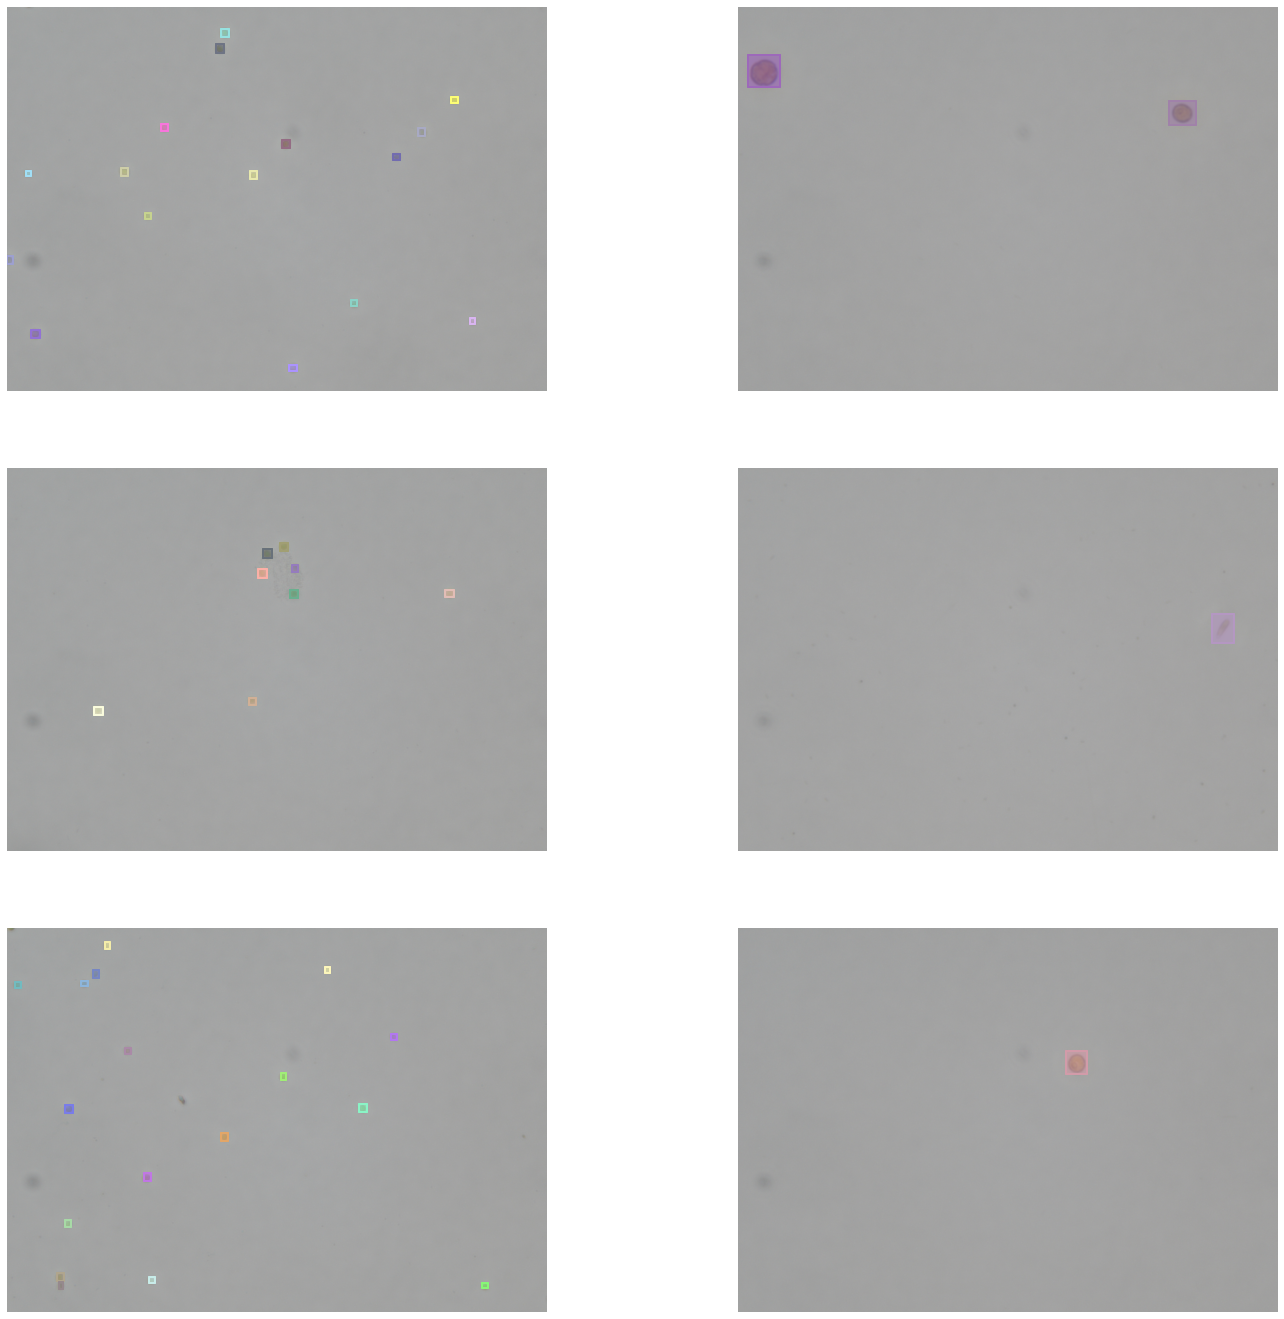

In [16]:
n_row = 3
n_col = 2
imgs = coco.loadImgs(sample(img_ids, n_row * n_col))
_, axs = plt.subplots(n_row, n_col, figsize=(12 * n_col, 8 * n_row))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    img_img = Image.open(f"{data_dir}/{img['file_name']}")
    anns = coco.loadAnns(coco.getAnnIds(imgIds=[img['id']]))
    ax.imshow(img_img)
    plt.sca(ax)
    coco.showAnns(anns, draw_bbox=True)
    plt.axis('off')
plt.show()

In [15]:
import os
print(len(os.listdir('../../input/training_set/train/images/')))
print(len(os.listdir('./mmdetection-master/data/coco/train2017/')))

537
429
